In [1]:
import torch
import torchvision.datasets
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

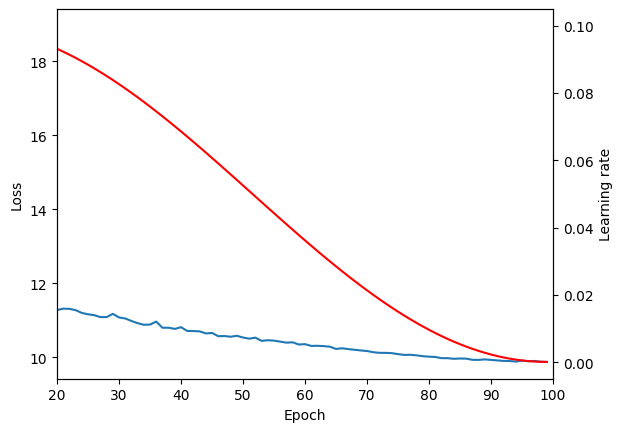

# Idk


In [2]:
d = torchvision.datasets.CIFAR10(root='~/data', train=True, download=True)
p = torchvision.datasets.CIFAR10(root='~/data', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
d.data.mean(axis=(0,1,2))/255
d.data.std(axis=(0,1,2))/255

array([0.24703223, 0.24348513, 0.26158784])

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
# DO NOT COMPUTE

# d = unpickle("C:/Users/Théau Blanchard/data/cifar-10-batches-py/test_batch")
# df_name_test = pd.DataFrame(columns=['name', 'label'])
# for j in range(len(d[b'labels'])):
#     df_name_test =pd.concat([df_name_test, pd.DataFrame({'name': d[b'filenames'][j].decode('utf-8'), 'label': d[b'labels'][j]}, index=[0])], ignore_index=True)


# df_name = pd.DataFrame(columns=['name', 'label'])
# for i in range(1,6):
#     d = unpickle(f"C:/Users/Théau Blanchard/data/cifar-10-batches-py/data_batch_{i}")
#     print(len(d[b'labels']))
#     for j in range(len(d[b'labels'])):

#         # df_name = df_name.append({'name': d[b'filenames'][j], 'label': d[b'labels'][j]}, ignore_index=True)
#         df_name =pd.concat([df_name, pd.DataFrame({'name': d[b'filenames'][j].decode('utf-8'), 'label': d[b'labels'][j]}, index=[0])], ignore_index=True)



# df_train_100 = df_name.copy()
# df_train_10 = df_name.sample(frac=0.1, random_state=0)
# df_train_1 = df_name.sample(frac=0.01, random_state=0)

# df_train_100.to_csv("./Cifar10_train_split_100.csv", index=False)
# df_train_10.to_csv("./Cifar10_train_split_10.csv", index=False)
# df_train_1.to_csv("./Cifar10_train_split_1.csv", index=False)
# df_name_test.to_csv("./Cifar10_test.csv", index=False)

In [6]:
df_train_100 = pd.read_csv("./Cifar10_train_split_100.csv")
df_train_10 = pd.read_csv("./Cifar10_train_split_10.csv")
df_train_1 = pd.read_csv("./Cifar10_train_split_1.csv")
df_name_test = pd.read_csv("./Cifar10_test.csv")

In [7]:
def cifarTo_png_v1(export_path,batch_files_path, df, classes_name,test=False,percent=100):
    if test:
        print("Starting")
        d = unpickle(batch_files_path+"/test_batch")
        for j in range(len(d[b'labels'])):
            img = d[b'data'][j].reshape(3,32,32).transpose(1,2,0)
            name = df['name'][j].strip("b'")
            plt.imsave(f"{export_path}/test/{classes_name[d[b'labels'][j]]}/{name}", img)
        print("Done")

    else:
        print("Starting")
        for i in range(1,6):
            d = unpickle(batch_files_path + f"/data_batch_{i}")
            for name in df['name']:
                for j in range(len(d[b'labels'])):
                    name_d = d[b'filenames'][j].decode("utf-8")
                    if name == name_d:
                        img = d[b'data'][j].reshape(3,32,32).transpose(1,2,0)
                        plt.imsave(f"{export_path}/train_{percent}/{classes_name[d[b'labels'][j]]}/{name_d}", img)
                        break
        print("Done")


In [8]:
import numpy as np
from PIL import Image

def cifarTo_png(export_path, batch_files_path, df, classes_name, test=False, percent=100):
    
    if test:
        print("Starting test")
        d = unpickle(batch_files_path+"/test_batch")
        names = d[b'filenames']
        labels = d[b'labels']
        data = d[b'data']
        for name, label, dat in (zip(names, labels, data)):
            img = dat.reshape(3,32,32).transpose(1,2,0)
            name = name.decode("utf-8")
            plt.imsave(f"{export_path}/test/{classes_name[label]}/{name}", img)
        print("Done")
    else:
        print("Starting train")
        for j in range(1,6):
            d = unpickle(f"{batch_files_path}/data_batch_{j}")
            print(f"Batch {j}, number of images : {len(d[b'labels'])}")
            for i in range(len(d[b'labels'])):
                if df["name"].str.contains(d[b'filenames'][i].decode("utf-8")).any():
                    img = d[b'data'][i].reshape(3,32,32).transpose(1,2,0)
                    name = d[b'filenames'][i].decode("utf-8")
                    plt.imsave(f"{export_path}/train_{percent}/{classes_name[d[b'labels'][i]]}/{name}", img)
        print("Done")


In [9]:
export_path = "./data/cifar10_v2"
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Create the folder of classes_name in export_path
for i in range(len(classes_name)):
    os.makedirs(export_path + "/train_100/" + classes_name[i], exist_ok=True)
    os.makedirs(export_path + "/test/" + classes_name[i], exist_ok=True)
    os.makedirs(export_path + "/train_10/" + classes_name[i], exist_ok=True)
    os.makedirs(export_path + "/train_1/" + classes_name[i], exist_ok=True)

cifarTo_png(export_path,"C:/Users/Théau Blanchard/data/cifar-10-batches-py", df_name_test, classes_name,test=True)
print("okok")
cifarTo_png(export_path,"C:/Users/Théau Blanchard/data/cifar-10-batches-py", df_train_100, classes_name,percent=100)
cifarTo_png(export_path,"C:/Users/Théau Blanchard/data/cifar-10-batches-py", df_train_10, classes_name,percent=10)
cifarTo_png(export_path,"C:/Users/Théau Blanchard/data/cifar-10-batches-py", df_train_1, classes_name,percent=1)

Starting test
Done
okok
Starting train
Batch 1, number of images : 10000
Batch 2, number of images : 10000
Batch 3, number of images : 10000
Batch 4, number of images : 10000
Batch 5, number of images : 10000
Done
Starting train
Batch 1, number of images : 10000
Batch 2, number of images : 10000
Batch 3, number of images : 10000
Batch 4, number of images : 10000
Batch 5, number of images : 10000
Done
Starting train
Batch 1, number of images : 10000
Batch 2, number of images : 10000
Batch 3, number of images : 10000
Batch 4, number of images : 10000
Batch 5, number of images : 10000
Done
